In [23]:
%matplotlib inline

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from matplotlib import cm

In [6]:
path = "../data/ccmp/2010/01/analysis_20100103_v11l30flk.nc"

In [7]:
nc = Dataset(path, 'r')

In [8]:
print nc.variables.keys()

[u'lon', u'lat', u'time', u'uwnd', u'vwnd', u'nobs']


In [12]:
print nc.variables['time'].ncattrs()

[u'units', u'long_name', u'actual_range', u'delta_t', u'avg_period']


In [13]:
print nc.variables['time'].units

hours since 1987-01-01 00:00:0.0


In [14]:
time = num2date(nc.variables['time'][:], nc.variables['time'].units)

In [67]:
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
u = nc.variables['uwnd'][:]
v = nc.variables['vwnd'][:]

In [68]:
w = np.sqrt(u**2 + v**2)

In [69]:
print time.shape
print lat.shape
print lon.shape
print w.shape

(4,)
(628,)
(1440,)
(4, 628, 1440)


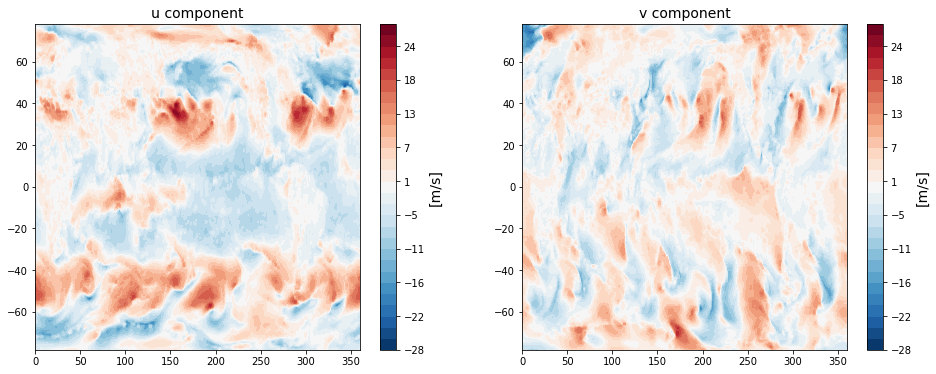

In [85]:
lin = np.round(np.linspace(-28,28,30))
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.contourf(lon, lat,u[0], lin, cmap=cm.RdBu_r)
cbar = plt.colorbar()
cbar.set_label('[m/s]', fontsize=14)
plt.title('u component', fontsize=14)
plt.subplot(122)
plt.contourf(lon, lat,v[0], lin, cmap=cm.RdBu_r)
cbar = plt.colorbar()
cbar.set_label('[m/s]', fontsize=14)
plt.title('v component', fontsize=14)

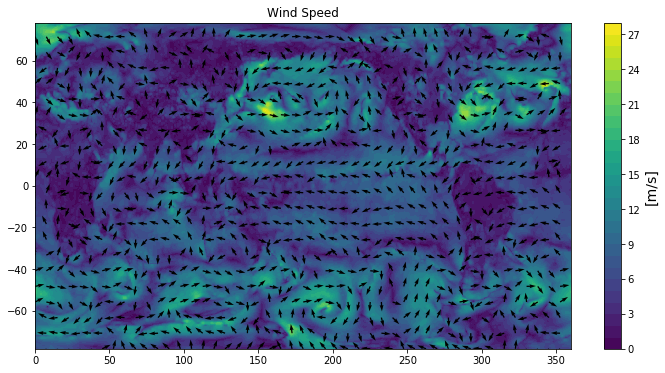

In [84]:
sub = 30
plt.figure(figsize=(12,6))
cs = plt.contourf(lon, lat,w[0], 30)
plt.quiver(lon[::sub], lat[::sub], u[0][::sub,::sub]/w[0][::sub,::sub],
           v[0][::sub,::sub]/w[0][::sub,::sub])
cbar = plt.colorbar(cs)
cbar.set_label('[m/s]', fontsize=14)
plt.title('Wind Speed')
plt.show()